# Implementación de algoritmo de regresión lineal multivariable (MLR) para predicción de la humedad de un secador de Maíz.

## <font color= blue> 1. Preparación de la base de datos.</font>

Realizamos el mismo tratamiento a la base de datos que en los modelos de regresión lineal, es decir, eliminando las características seleccionadas en el análisis operativo, cambiando las variables categoricas o de estado a valores numericos y eliminando los outliers encontrados en la regresión lineal.

Primero importamos la librerias a utilizar:

In [6]:
#Importar librerias
library("readxl")


Warning message:
"package 'readxl' was built under R version 3.6.3"

Se carga la base de datos y se obtiene información de la misma:

In [7]:
#Mandar llamar datos

data <- read_excel("C:/Users/agaray/Google Drive/1.Maestría/5.TOG/1.IDI III/Dataset_Secador_gluten_Rev1.xlsx",  sheet ='Dataset') #index_col = 'Timestamp')
str(data)

tibble [3,416 x 36] (S3: tbl_df/tbl/data.frame)
 $ Timestamp             : POSIXct[1:3416], format: "2021-08-30 18:00:00" "2021-08-30 16:00:00" ...
 $ Humedad               : num [1:3416] 11.7 11.9 11.3 12.4 10.6 ...
 $ Nivel_RVF_1           : num [1:3416] 80.1 79.9 79.8 81.1 80.2 ...
 $ RPM_RVF_1             : num [1:3416] 605 604 605 605 604 ...
 $ Nivel_RVF_2           : num [1:3416] 80.8 80.4 79.5 79.3 80.5 ...
 $ RPM_RVF_2             : num [1:3416] 1096 1096 1095 1095 1096 ...
 $ Nivel_RVF_3           : num [1:3416] 79.6 80.4 79.6 80.2 79.3 ...
 $ RPM_RVF_3             : num [1:3416] 1104 1103 1103 1103 1103 ...
 $ Nivel_RVF_4           : num [1:3416] 82.6 81.1 81.2 78 78 ...
 $ RPM_RVF_4             : num [1:3416] 1104 1106 1105 1104 1106 ...
 $ Nivel_RVF_5           : num [1:3416] 80.2 80.2 79.8 80.5 79.1 ...
 $ RPM_RVF_5             : num [1:3416] 945 945 945 945 945 ...
 $ Nivel_RVF_6           : num [1:3416] 80 80.4 79.9 80.8 79.7 ...
 $ RPM_RVF_6             : num [1:3416] 

Cambiamos el estado de las variables tipo objeto:

In [8]:
#Modificar los estados de las varibles independientes "Triturador_1" y "Triturador_2".
data$Triturador_1 <- as.numeric(data$Triturador_1[data$Triturador_1 == "Active"] <- 1)
data$Triturador_1 <- as.numeric(data$Triturador_1[data$Triturador_1 == "Inactive"] <- 0)
data$Triturador_2 <- as.numeric(data$Triturador_2[data$Triturador_2 == "Active"] <- 1)
data$Triturador_2 <- as.numeric(data$Triturador_2[data$Triturador_2 == "Inactive"] <- 0)
data$Triturador_1_Bypass <- as.numeric(data$Triturador_1_Bypass[data$Triturador_1_Bypass == "Open"] <- 1)
data$Triturador_1_Bypass <- as.numeric(data$Triturador_1_Bypass[data$Triturador_1_Bypass == "Closed"] <- 0)
data$Triturador_2_Bypass <- as.numeric(data$Triturador_2_Bypass[data$Triturador_2_Bypass == "Open"] <- 1)
data$Triturador_2_Bypass <- as.numeric(data$Triturador_2_Bypass[data$Triturador_2_Bypass == "Closed"] <- 0)

str(data)

tibble [3,416 x 36] (S3: tbl_df/tbl/data.frame)
 $ Timestamp             : POSIXct[1:3416], format: "2021-08-30 18:00:00" "2021-08-30 16:00:00" ...
 $ Humedad               : num [1:3416] 11.7 11.9 11.3 12.4 10.6 ...
 $ Nivel_RVF_1           : num [1:3416] 80.1 79.9 79.8 81.1 80.2 ...
 $ RPM_RVF_1             : num [1:3416] 605 604 605 605 604 ...
 $ Nivel_RVF_2           : num [1:3416] 80.8 80.4 79.5 79.3 80.5 ...
 $ RPM_RVF_2             : num [1:3416] 1096 1096 1095 1095 1096 ...
 $ Nivel_RVF_3           : num [1:3416] 79.6 80.4 79.6 80.2 79.3 ...
 $ RPM_RVF_3             : num [1:3416] 1104 1103 1103 1103 1103 ...
 $ Nivel_RVF_4           : num [1:3416] 82.6 81.1 81.2 78 78 ...
 $ RPM_RVF_4             : num [1:3416] 1104 1106 1105 1104 1106 ...
 $ Nivel_RVF_5           : num [1:3416] 80.2 80.2 79.8 80.5 79.1 ...
 $ RPM_RVF_5             : num [1:3416] 945 945 945 945 945 ...
 $ Nivel_RVF_6           : num [1:3416] 80 80.4 79.9 80.8 79.7 ...
 $ RPM_RVF_6             : num [1:3416] 

Quitamos del dataset las variables con datos vacíos:

In [9]:
data <- subset(data, select = -c(Flujo_aire, Motor_ventilador_humos))
str(data)

tibble [3,416 x 34] (S3: tbl_df/tbl/data.frame)
 $ Timestamp             : POSIXct[1:3416], format: "2021-08-30 18:00:00" "2021-08-30 16:00:00" ...
 $ Humedad               : num [1:3416] 11.7 11.9 11.3 12.4 10.6 ...
 $ Nivel_RVF_1           : num [1:3416] 80.1 79.9 79.8 81.1 80.2 ...
 $ RPM_RVF_1             : num [1:3416] 605 604 605 605 604 ...
 $ Nivel_RVF_2           : num [1:3416] 80.8 80.4 79.5 79.3 80.5 ...
 $ RPM_RVF_2             : num [1:3416] 1096 1096 1095 1095 1096 ...
 $ Nivel_RVF_3           : num [1:3416] 79.6 80.4 79.6 80.2 79.3 ...
 $ RPM_RVF_3             : num [1:3416] 1104 1103 1103 1103 1103 ...
 $ Nivel_RVF_4           : num [1:3416] 82.6 81.1 81.2 78 78 ...
 $ RPM_RVF_4             : num [1:3416] 1104 1106 1105 1104 1106 ...
 $ Nivel_RVF_5           : num [1:3416] 80.2 80.2 79.8 80.5 79.1 ...
 $ RPM_RVF_5             : num [1:3416] 945 945 945 945 945 ...
 $ Nivel_RVF_6           : num [1:3416] 80 80.4 79.9 80.8 79.7 ...
 $ RPM_RVF_6             : num [1:3416] 

Se eliminan las velocidades de los filtros rotativos:

In [10]:
data <- subset(data, select = -c(RPM_RVF_1,RPM_RVF_2,RPM_RVF_3,RPM_RVF_4,RPM_RVF_5,RPM_RVF_6))
str(data)

tibble [3,416 x 28] (S3: tbl_df/tbl/data.frame)
 $ Timestamp             : POSIXct[1:3416], format: "2021-08-30 18:00:00" "2021-08-30 16:00:00" ...
 $ Humedad               : num [1:3416] 11.7 11.9 11.3 12.4 10.6 ...
 $ Nivel_RVF_1           : num [1:3416] 80.1 79.9 79.8 81.1 80.2 ...
 $ Nivel_RVF_2           : num [1:3416] 80.8 80.4 79.5 79.3 80.5 ...
 $ Nivel_RVF_3           : num [1:3416] 79.6 80.4 79.6 80.2 79.3 ...
 $ Nivel_RVF_4           : num [1:3416] 82.6 81.1 81.2 78 78 ...
 $ Nivel_RVF_5           : num [1:3416] 80.2 80.2 79.8 80.5 79.1 ...
 $ Nivel_RVF_6           : num [1:3416] 80 80.4 79.9 80.8 79.7 ...
 $ Triturador_1          : num [1:3416] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_2          : num [1:3416] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_1_A        : num [1:3416] 26.5 25.5 25.4 25.5 25.2 ...
 $ Triturador_2_A        : num [1:3416] 24.7 23.1 22.6 24.8 23.6 ...
 $ Triturador_1_Bypass   : num [1:3416] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_2_Bypass   : num [1:3416] 0 0 0

Finalmente, se elimina el flujo de gas por ser descrito a traves de la caracteristica TE:

In [11]:
#Eliminar variables del Dataset original de acuerdo a análisis previos para Random Forest:
data <- subset(data, select = -c(Flujo_gas))
str(data)

tibble [3,416 x 27] (S3: tbl_df/tbl/data.frame)
 $ Timestamp             : POSIXct[1:3416], format: "2021-08-30 18:00:00" "2021-08-30 16:00:00" ...
 $ Humedad               : num [1:3416] 11.7 11.9 11.3 12.4 10.6 ...
 $ Nivel_RVF_1           : num [1:3416] 80.1 79.9 79.8 81.1 80.2 ...
 $ Nivel_RVF_2           : num [1:3416] 80.8 80.4 79.5 79.3 80.5 ...
 $ Nivel_RVF_3           : num [1:3416] 79.6 80.4 79.6 80.2 79.3 ...
 $ Nivel_RVF_4           : num [1:3416] 82.6 81.1 81.2 78 78 ...
 $ Nivel_RVF_5           : num [1:3416] 80.2 80.2 79.8 80.5 79.1 ...
 $ Nivel_RVF_6           : num [1:3416] 80 80.4 79.9 80.8 79.7 ...
 $ Triturador_1          : num [1:3416] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_2          : num [1:3416] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_1_A        : num [1:3416] 26.5 25.5 25.4 25.5 25.2 ...
 $ Triturador_2_A        : num [1:3416] 24.7 23.1 22.6 24.8 23.6 ...
 $ Triturador_1_Bypass   : num [1:3416] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_2_Bypass   : num [1:3416] 0 0 0

Asi, tenemos una salida **Humedad** con 25 características.

Continuamos eliminando los outliers del analisis de regresión lineal:

In [12]:
data <- data[-c(2232, 2086, 537, 3173, 2961, 2232, 2818), ]
str(data)

tibble [3,410 x 27] (S3: tbl_df/tbl/data.frame)
 $ Timestamp             : POSIXct[1:3410], format: "2021-08-30 18:00:00" "2021-08-30 16:00:00" ...
 $ Humedad               : num [1:3410] 11.7 11.9 11.3 12.4 10.6 ...
 $ Nivel_RVF_1           : num [1:3410] 80.1 79.9 79.8 81.1 80.2 ...
 $ Nivel_RVF_2           : num [1:3410] 80.8 80.4 79.5 79.3 80.5 ...
 $ Nivel_RVF_3           : num [1:3410] 79.6 80.4 79.6 80.2 79.3 ...
 $ Nivel_RVF_4           : num [1:3410] 82.6 81.1 81.2 78 78 ...
 $ Nivel_RVF_5           : num [1:3410] 80.2 80.2 79.8 80.5 79.1 ...
 $ Nivel_RVF_6           : num [1:3410] 80 80.4 79.9 80.8 79.7 ...
 $ Triturador_1          : num [1:3410] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_2          : num [1:3410] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_1_A        : num [1:3410] 26.5 25.5 25.4 25.5 25.2 ...
 $ Triturador_2_A        : num [1:3410] 24.7 23.1 22.6 24.8 23.6 ...
 $ Triturador_1_Bypass   : num [1:3410] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_2_Bypass   : num [1:3410] 0 0 0

Este es el dataset que utilizaremos en los algoritmos de MLR.

## <font color= blue> 2. Implementación de la regresión lineal multivariable (MLR).</font>

### MLR sin datos normalizados sin eliminación de caracteristícas

Creamos datos de entrenamiento y prueba:

In [13]:
library(caTools)
set.seed(42)
data <- subset(data, select = -c(Timestamp))
split <- sample.split(data$Humedad, SplitRatio = 0.8)
train_dataLR <- subset(data, split == TRUE)
test_dataLR <- subset(data, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

Obtenemos las características (X) y la variable a predecir (y, salida) para uso en el algoritmo:

In [14]:
#Variable a predecir y
yLR_train <- train_dataLR['Humedad']
yLR_test <- test_dataLR['Humedad']

#Características X
XLR_train <- train_dataLR[,2:26]
XLR_test  <- test_dataLR[,2:26]

str(XLR_test)

tibble [613 x 25] (S3: tbl_df/tbl/data.frame)
 $ Nivel_RVF_1           : num [1:613] 80.2 79.2 80 80.4 80.7 ...
 $ Nivel_RVF_2           : num [1:613] 80.5 80.4 80.5 80 81 ...
 $ Nivel_RVF_3           : num [1:613] 79.3 80.8 79.8 80.8 80.3 ...
 $ Nivel_RVF_4           : num [1:613] 78 77.7 82 81.6 77.6 ...
 $ Nivel_RVF_5           : num [1:613] 79.1 80.3 80 79.3 79.6 ...
 $ Nivel_RVF_6           : num [1:613] 79.7 80.2 80.1 80.1 80 ...
 $ Triturador_1          : num [1:613] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_2          : num [1:613] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_1_A        : num [1:613] 25.2 25.9 26.9 26.8 27.1 ...
 $ Triturador_2_A        : num [1:613] 23.6 22.7 24.1 22.7 21.6 ...
 $ Triturador_1_Bypass   : num [1:613] 0 0 0 0 0 0 0 0 0 0 ...
 $ Triturador_2_Bypass   : num [1:613] 0 0 0 0 0 0 0 0 0 0 ...
 $ TE                    : num [1:613] 365 368 373 321 335 ...
 $ TS                    : num [1:613] 90.1 92.3 89.7 82 85.3 ...
 $ Draft                 : num [1:613] 0.03

Entrenamos el modelo usando la librería olsrr para algoritmo de MLR:

In [15]:
library(olsrr)

LR <- lm(Humedad ~ ., data = train_dataLR)

ols_regress(LR)

Warning message:
"package 'olsrr' was built under R version 3.6.3"
Attaching package: 'olsrr'

The following object is masked from 'package:MASS':

    cement

The following object is masked from 'package:datasets':

    rivers

Warning message in b * sx:
"longer object length is not a multiple of shorter object length"

                        Model Summary                          
--------------------------------------------------------------
R                       0.431       RMSE                2.026 
R-Squared               0.185       Coef. Var          19.294 
Adj. R-Squared          0.179       MSE                 4.105 
Pred R-Squared          0.168       MAE                 1.573 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                 ANOVA                                  
-----------------------------------------------------------------------
                 Sum of                                                
                Squares          DF    Mean Square      F         Sig. 
-----------------------------------------------------------------------
Regression     2592.974          21        123.475    30.079    0.0000 
Residual      11391.290        2775      

De los coefcientes *Beta* observamos que las variables:

- Triturador_1
- Triturador_2
- Triturador_1_Bypass
- Triturador_2_Bypass

Presentan un valor NA **debido a que las variables en cuestion estan linealmente relacionadas con las otras variables**, por lo que se procede a eliminarlas y repetir la regresión:

In [16]:
data2 <- subset(data, select = -c(Triturador_1, Triturador_2, Triturador_1_Bypass, Triturador_2_Bypass))
split <- sample.split(data2$Humedad, SplitRatio = 0.8)
train_data2LR <- subset(data2, split == TRUE)
test_data2LR <- subset(data2, split == FALSE)

str(train_data2LR)

tibble [2,797 x 22] (S3: tbl_df/tbl/data.frame)
 $ Humedad               : num [1:2797] 11.73 11.92 12.44 10.61 9.99 ...
 $ Nivel_RVF_1           : num [1:2797] 80.1 79.9 81.1 80.2 79.2 ...
 $ Nivel_RVF_2           : num [1:2797] 80.8 80.4 79.3 80.5 80.4 ...
 $ Nivel_RVF_3           : num [1:2797] 79.6 80.4 80.2 79.3 80.8 ...
 $ Nivel_RVF_4           : num [1:2797] 82.6 81.1 78 78 77.7 ...
 $ Nivel_RVF_5           : num [1:2797] 80.2 80.2 80.5 79.1 80.3 ...
 $ Nivel_RVF_6           : num [1:2797] 80 80.4 80.8 79.7 80.2 ...
 $ Triturador_1_A        : num [1:2797] 26.5 25.5 25.5 25.2 25.9 ...
 $ Triturador_2_A        : num [1:2797] 24.7 23.1 24.8 23.6 22.7 ...
 $ TE                    : num [1:2797] 385 387 361 365 368 ...
 $ TS                    : num [1:2797] 90.9 92.3 89.1 90.1 92.3 ...
 $ Draft                 : num [1:2797] 1.0341 1.0206 0.6614 0.0334 -0.2005 ...
 $ Damper_Reciclo        : num [1:2797] 100 100 100 100 100 100 100 100 100 100 ...
 $ Damper_atm            : num [1:27

In [17]:
LR2 <- lm(Humedad ~ ., data = train_data2LR)

ols_regress(LR2)

                        Model Summary                          
--------------------------------------------------------------
R                       0.433       RMSE                2.023 
R-Squared               0.188       Coef. Var          19.269 
Adj. R-Squared          0.181       MSE                 4.094 
Pred R-Squared          0.172       MAE                 1.569 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                 ANOVA                                  
-----------------------------------------------------------------------
                 Sum of                                                
                Squares          DF    Mean Square      F         Sig. 
-----------------------------------------------------------------------
Regression     2622.482          21        124.880    30.501    0.0000 
Residual      11361.782        2775      

Obtenemos la grafica de residuales vs valores ajustados para detectar no-linealidad o valores atipicos:

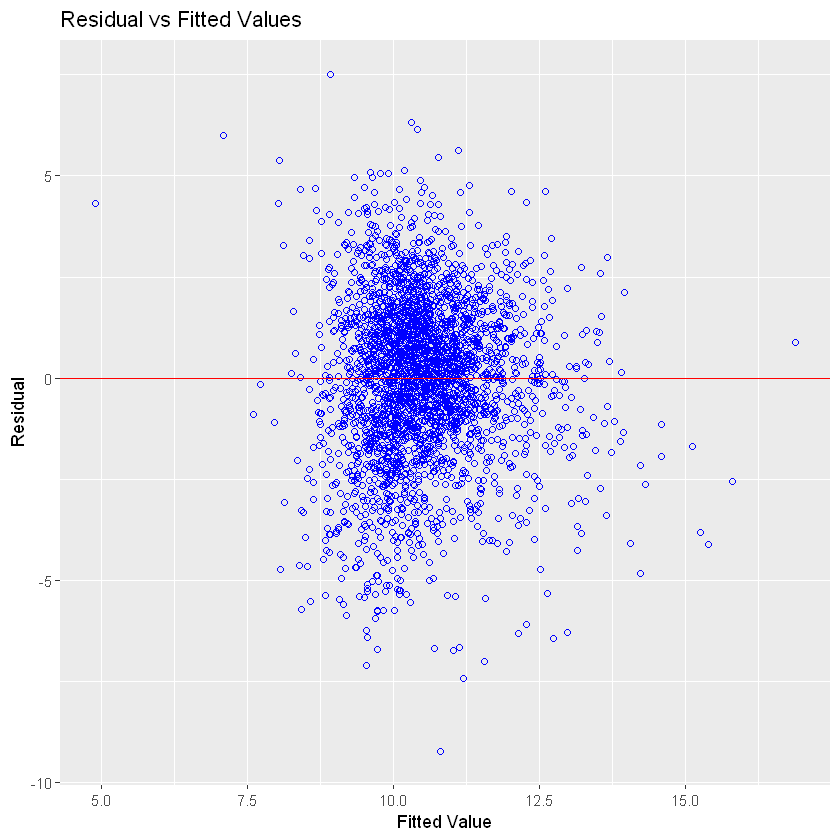

In [18]:
ols_plot_resid_fit(LR2)

Obtenemos una "Residual Fit Spread" y un QQ-plot para observar de mejor de mejor manera la normalidad de los residuales:

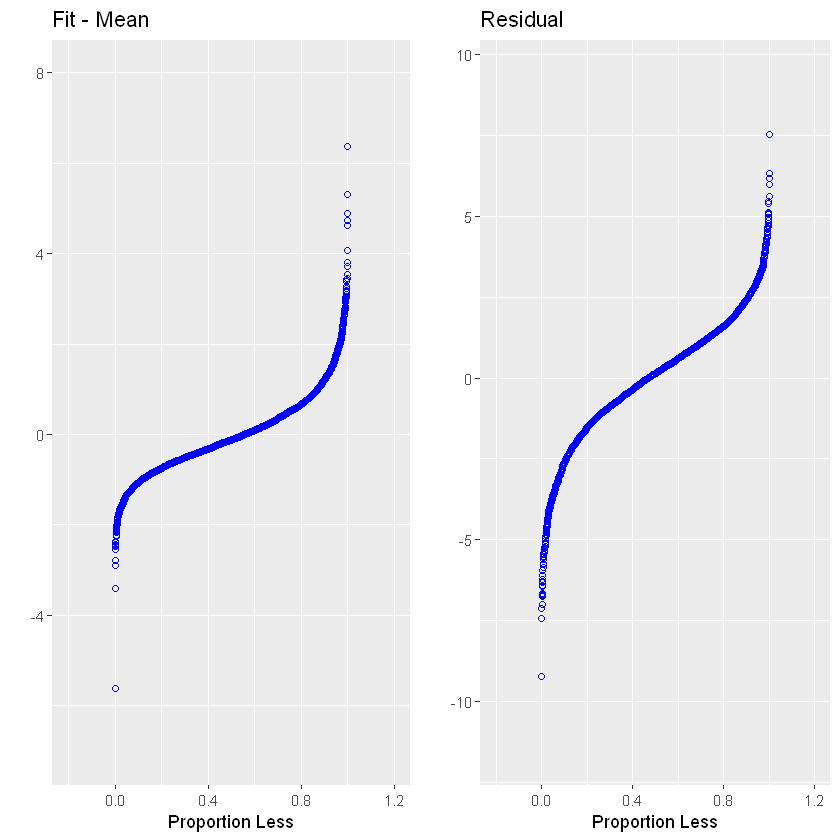

In [19]:
ols_plot_resid_fit_spread(LR2)

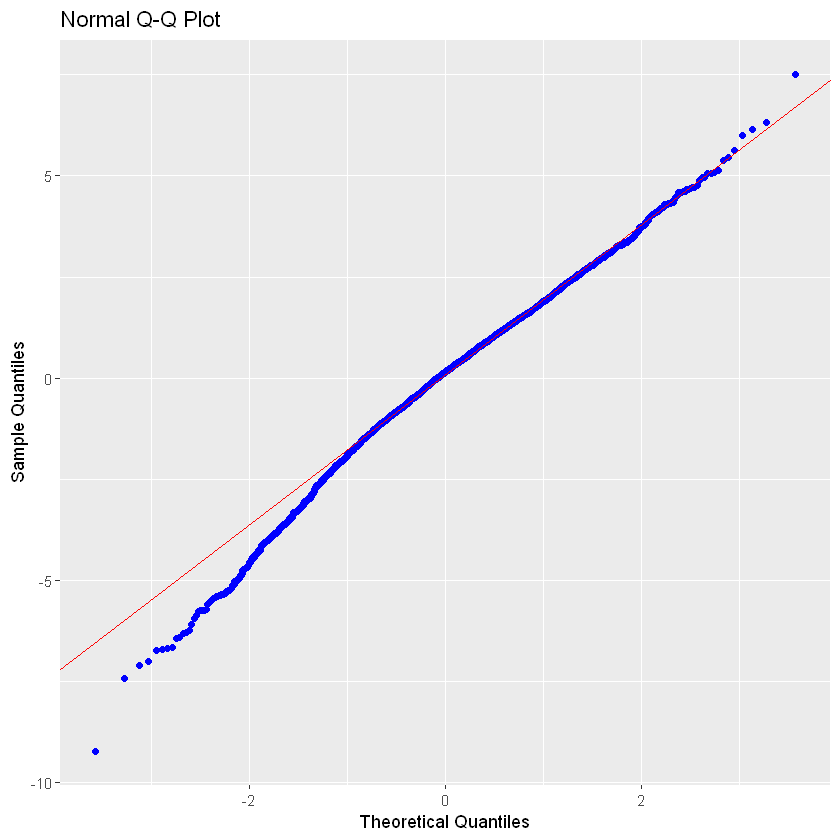

In [20]:
ols_plot_resid_qq(LR2)

De estas gráficas obtenemos **que el modelo no presenta comportamiento lineal**.

Seguimos con la prueba Breusch Pagan para detectar si el sistema presenta homocedasticidad:

In [21]:
ols_test_breusch_pagan(LR2)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : Humedad 
 Variables: fitted values of Humedad 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    39.75717 
 Prob > Chi2   =    2.875823e-10 

Usamos el modelo para predecir con los datos de prueba:

Al ser el p-value menor a 0.05 (8.710033e-16 -13<0.05) recahazamos la Ho (La varianza es constante) por lo que decimos **que el modelo presenta heterocedasticidad**.

Seguimos con la colinealidad:

In [22]:
ols_coll_diag(LR2)

Tolerance and Variance Inflation Factor
---------------------------------------
                Variables Tolerance      VIF
1             Nivel_RVF_1 0.9337645 1.070934
2             Nivel_RVF_2 0.9530499 1.049263
3             Nivel_RVF_3 0.9719477 1.028862
4             Nivel_RVF_4 0.9567315 1.045225
5             Nivel_RVF_5 0.9300604 1.075199
6             Nivel_RVF_6 0.9358294 1.068571
7          Triturador_1_A 0.8308149 1.203638
8          Triturador_2_A 0.6505137 1.537247
9                      TE 0.3494993 2.861236
10                     TS 0.2964704 3.373018
11                  Draft 0.8060750 1.240579
12         Damper_Reciclo 0.6116558 1.634906
13             Damper_atm 0.7998319 1.250263
14        Damper_scrubber 0.5908173 1.692571
15          Motor_Secador 0.6452484 1.549791
16 Motor_soplador_reciclo 0.8151016 1.226841
17  Motor_gusano_descarga 0.6683334 1.496259
18  Motor_rastra_descarga 0.6539894 1.529077
19        Molino_salida_1 0.6044763 1.654325
20        Molino_sal

De los resultados obtenidos **no se observa colinealidad entre las variables**.

Pasamos a ver como predice el modelo con un grafico de observaciones vs predicciones:

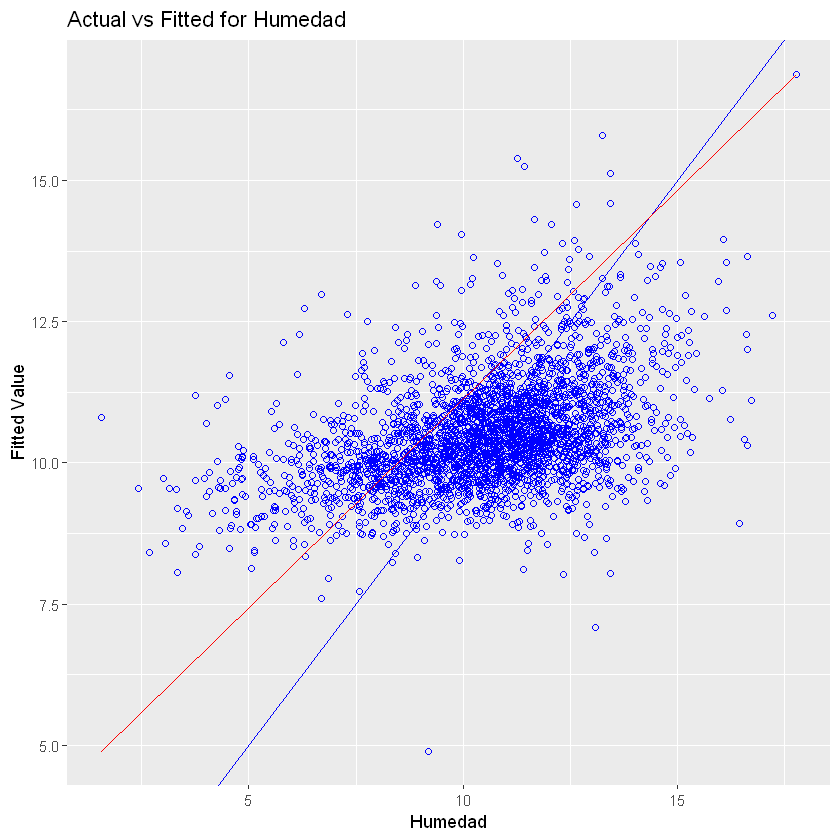

In [23]:
ols_plot_obs_fit(LR2)

Obtenemos las predicciones con los datos de prueba:

In [24]:
yLR_predict <- predict(LR2, XLR_test, interval="predict", level = 0.95)

Obtenemos el MSE:

In [58]:
library(MLmetrics)
MSE(test_data2LR$Humedad,yLR_predict[,1])

[1] 3.884137

Obtenemos el MAPE como medida de precisión del modelo:

In [59]:
(1 - MAPE(yLR_predict[,1], test_data2LR$Humedad))*100

[1] 84.62376

### MLR con datos normalizados sin eliminación de caracteristícas

Normalizamos los datos:

In [37]:
train_dataLRN <- train_data2LR
test_dataLRN <- test_data2LR



In [49]:
dataLRN_columns <- names(train_dataLRN)

#Normalizando datos de entrenamiento
for (col in dataLRN_columns){
    train_dataLRN[col] <- (train_dataLRN[col] - min(train_dataLRN[col])) / (max(train_dataLRN[col]) - min(train_dataLRN[col]))
}

#Normalizando datos de prueba
for (col in dataLRN_columns){
    test_dataLRN[col] <- (test_dataLRN[col] - min(test_dataLRN[col])) / (max(test_dataLRN[col]) - min(test_dataLRN[col]))
}

str(train_dataLRN)
str(test_dataLRN)

tibble [2,797 x 22] (S3: tbl_df/tbl/data.frame)
 $ Humedad               : num [1:2797] 0.627 0.639 0.671 0.558 0.52 ...
 $ Nivel_RVF_1           : num [1:2797] 0.772 0.77 0.782 0.773 0.764 ...
 $ Nivel_RVF_2           : num [1:2797] 0.927 0.922 0.91 0.924 0.923 ...
 $ Nivel_RVF_3           : num [1:2797] 0.796 0.804 0.802 0.793 0.808 ...
 $ Nivel_RVF_4           : num [1:2797] 0.826 0.811 0.78 0.78 0.777 ...
 $ Nivel_RVF_5           : num [1:2797] 0.798 0.798 0.802 0.788 0.799 ...
 $ Nivel_RVF_6           : num [1:2797] 0.787 0.791 0.794 0.783 0.788 ...
 $ Triturador_1_A        : num [1:2797] 0.0683 0.0657 0.0657 0.0649 0.0666 ...
 $ Triturador_2_A        : num [1:2797] 0.204 0.191 0.205 0.194 0.187 ...
 $ TE                    : num [1:2797] 0.591 0.596 0.54 0.549 0.555 ...
 $ TS                    : num [1:2797] 0.621 0.635 0.603 0.614 0.635 ...
 $ Draft                 : num [1:2797] 0.871 0.866 0.73 0.492 0.404 ...
 $ Damper_Reciclo        : num [1:2797] 1 1 1 1 1 1 1 1 1 1 ...
 $

In [50]:
LRN <- lm(Humedad ~ ., data = train_dataLRN)

ols_regress(LRN)

                        Model Summary                          
--------------------------------------------------------------
R                       0.433       RMSE                0.125 
R-Squared               0.188       Coef. Var          22.656 
Adj. R-Squared          0.181       MSE                 0.016 
Pred R-Squared          0.172       MAE                 0.097 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                 
---------------------------------------------------------------------
               Sum of                                                
              Squares          DF    Mean Square      F         Sig. 
---------------------------------------------------------------------
Regression      9.993          21          0.476    30.501    0.0000 
Residual       43.293        2775          0.016     

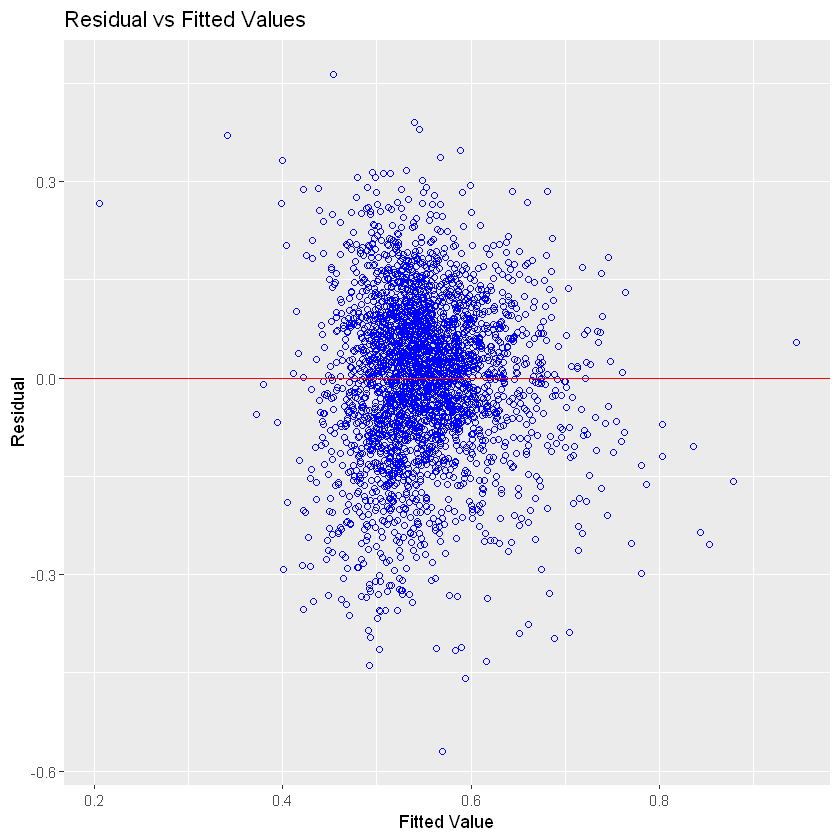

In [51]:
ols_plot_resid_fit(LRN)

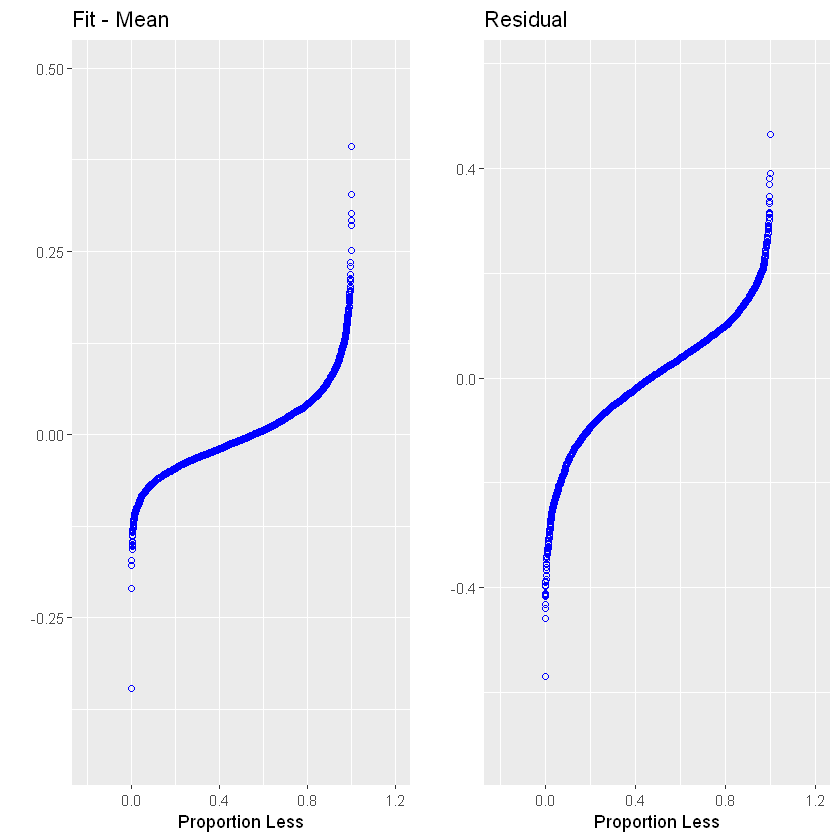

In [52]:
ols_plot_resid_fit_spread(LRN)

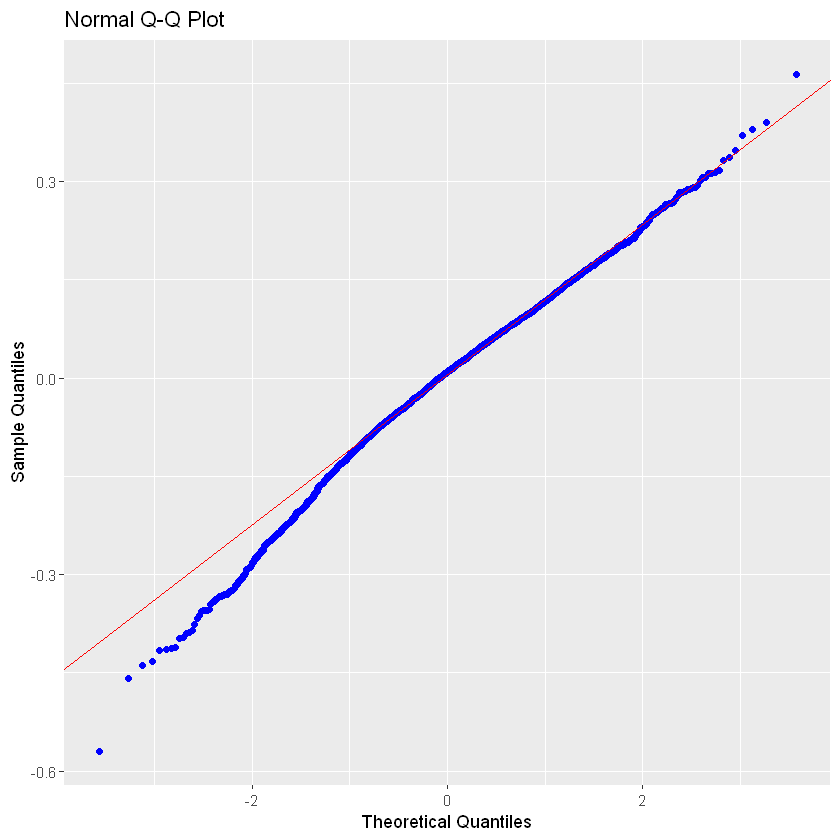

In [53]:
ols_plot_resid_qq(LRN)

In [54]:
ols_test_breusch_pagan(LRN)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                 
 -----------------------------------
 Response : Humedad 
 Variables: fitted values of Humedad 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    39.75717 
 Prob > Chi2   =    2.875823e-10 

In [55]:
ols_coll_diag(LRN)

Tolerance and Variance Inflation Factor
---------------------------------------
                Variables Tolerance      VIF
1             Nivel_RVF_1 0.9337645 1.070934
2             Nivel_RVF_2 0.9530499 1.049263
3             Nivel_RVF_3 0.9719477 1.028862
4             Nivel_RVF_4 0.9567315 1.045225
5             Nivel_RVF_5 0.9300604 1.075199
6             Nivel_RVF_6 0.9358294 1.068571
7          Triturador_1_A 0.8308149 1.203638
8          Triturador_2_A 0.6505137 1.537247
9                      TE 0.3494993 2.861236
10                     TS 0.2964704 3.373018
11                  Draft 0.8060750 1.240579
12         Damper_Reciclo 0.6116558 1.634906
13             Damper_atm 0.7998319 1.250263
14        Damper_scrubber 0.5908173 1.692571
15          Motor_Secador 0.6452484 1.549791
16 Motor_soplador_reciclo 0.8151016 1.226841
17  Motor_gusano_descarga 0.6683334 1.496259
18  Motor_rastra_descarga 0.6539894 1.529077
19        Molino_salida_1 0.6044763 1.654325
20        Molino_sal

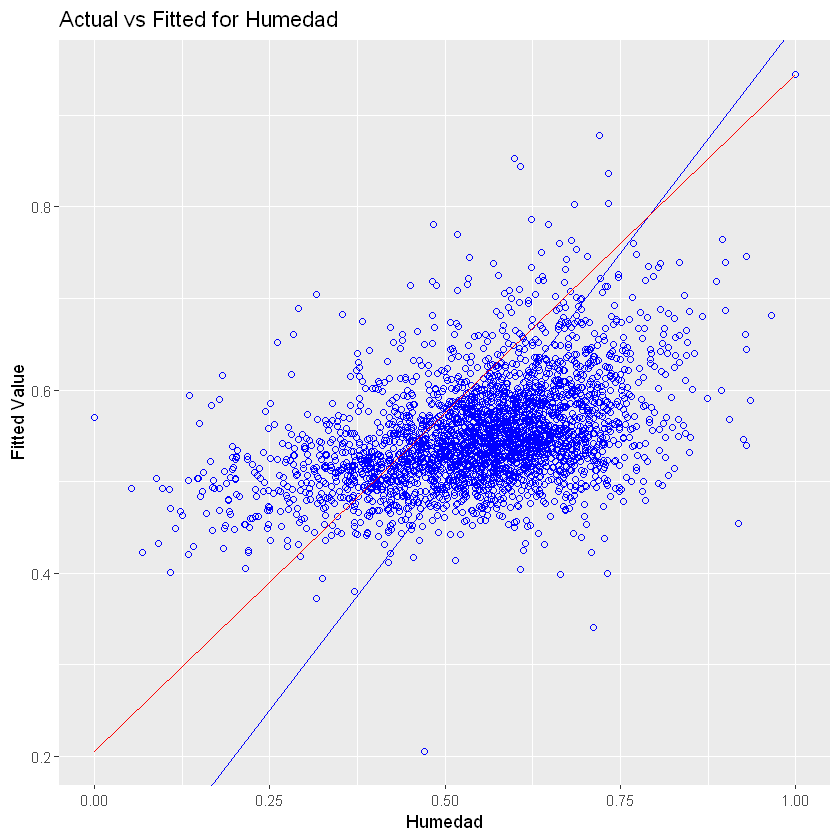

In [56]:
ols_plot_obs_fit(LRN)

In [89]:
yLRN_predict <- predict(LRN, XLRN_test, interval="predict", level = 0.95)
yLRN_pr <- yLRN_predict[,1]

In [90]:
#Regresando las predicciones al rango de operación
yLRN_pr <- (yLRN_pr*(max(test_data2LR['Humedad']) - min(test_data2LR['Humedad']))) + min(test_data2LR['Humedad'])
head(yLRN_pr)

1        2        3        4        5        6 
12.60356 12.00397 12.14069 12.52781 12.62553 12.45898

In [92]:
MSE(test_data2LR$Humedad,yLRN_pr)

[1] 4.525351

In [93]:
(1 - MAPE(yLRN_pr, test_data2LR$Humedad))*100

[1] 81.85372

### MLR con datos normalizados con eliminación de caracteristícas mediante metodo 'Stepwise Regression'.

In [94]:
# stepwise regression
LRSR <- lm(Humedad ~ ., data = train_dataLRN)
ols_step_both_p(LRSR)


                                      Stepwise Selection Summary                                       
------------------------------------------------------------------------------------------------------
                                   Added/                   Adj.                                          
Step           Variable           Removed     R-Square    R-Square      C(p)         AIC         RMSE     
------------------------------------------------------------------------------------------------------
   1    Motor_rastra_descarga     addition       0.096       0.096    294.9920    -3416.3174    0.1313    
   2       Molino_salida_1        addition       0.127       0.126    191.5680    -3511.4753    0.1291    
   3    Motor_soplador_reciclo    addition       0.138       0.137    153.9490    -3546.8783    0.1282    
   4          Damper_atm          addition       0.146       0.145    128.7790    -3570.8207    0.1276    
   5        Motor_Secador         addition     

[[1]]
NULL

[[2]]
NULL


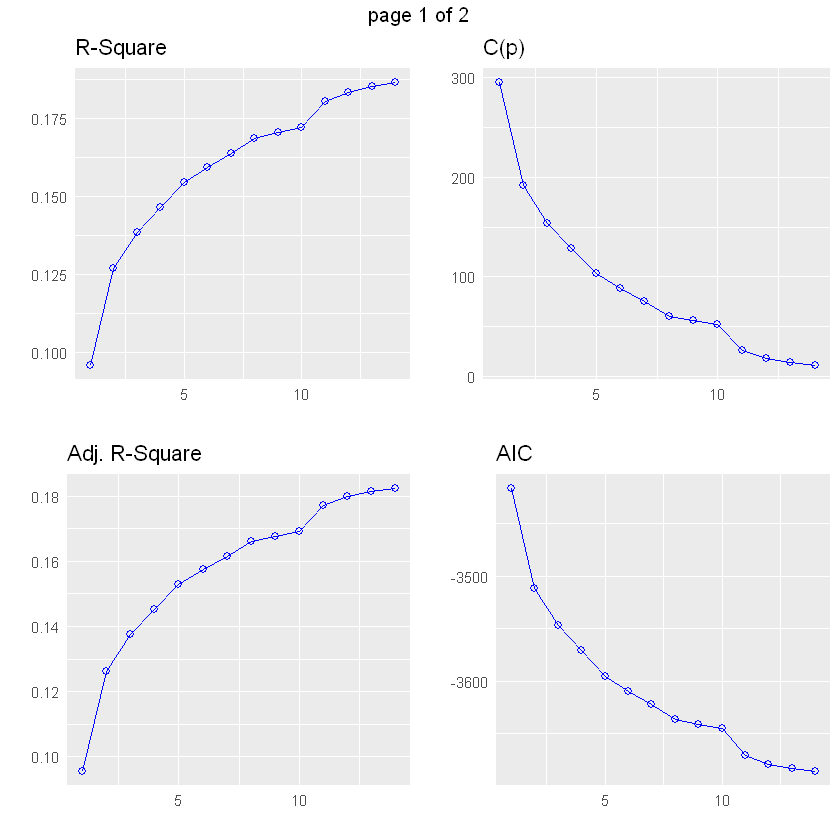

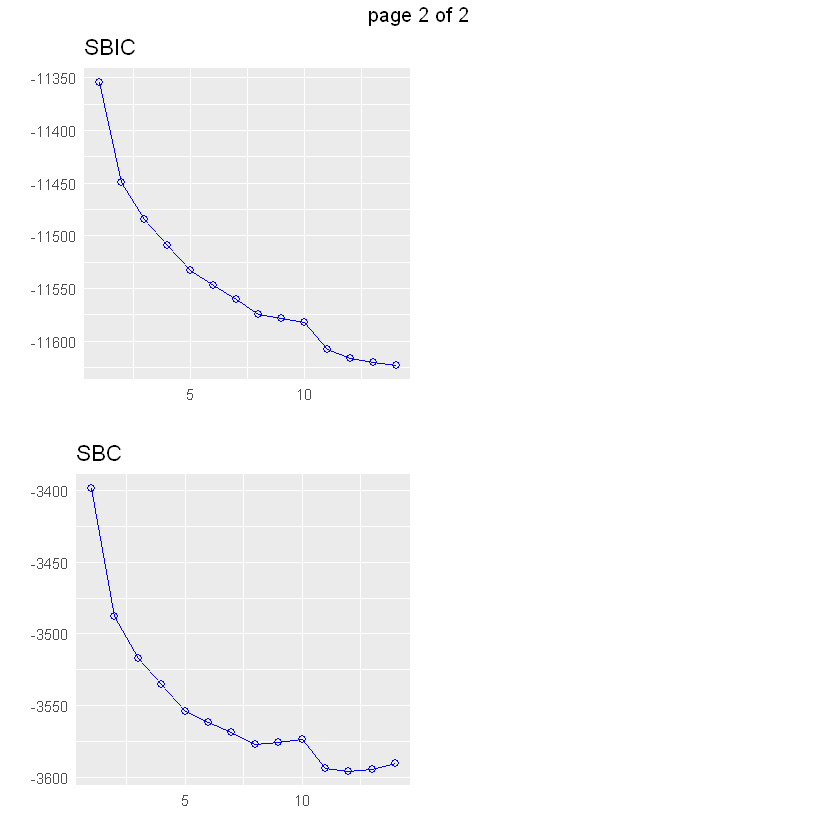

In [96]:
plot(ols_step_both_p(LRSR))

In [97]:
LRSR2 <- lm(Humedad ~ Motor_rastra_descarga + Molino_salida_1 + Motor_soplador_reciclo + Damper_atm + Motor_Secador + Damper_scrubber + Motor_gusano_descarga + Presion_filtro_bolsa + Nivel_RVF_1 + TS + TE + Triturador_2_A + Draft + Nivel_RVF_4, data = train_dataLRN)
ols_regress(LRSR2)

                        Model Summary                          
--------------------------------------------------------------
R                       0.432       RMSE                0.125 
R-Squared               0.186       Coef. Var          22.642 
Adj. R-Squared          0.182       MSE                 0.016 
Pred R-Squared          0.176       MAE                 0.097 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                 
---------------------------------------------------------------------
               Sum of                                                
              Squares          DF    Mean Square      F         Sig. 
---------------------------------------------------------------------
Regression      9.937          14          0.710    45.555    0.0000 
Residual       43.348        2782          0.016     

In [98]:
yLRNSR_predict <- predict(LRSR2, XLRN_test, interval="predict", level = 0.95)
yLRNSR_pr <- yLRNSR_predict[,1]

In [99]:
#Regresando las predicciones al rango de operación
yLRNSR_pr <- (yLRNSR_pr*(max(test_data2LR['Humedad']) - min(test_data2LR['Humedad']))) + min(test_data2LR['Humedad'])
head(yLRNSR_pr)

1        2        3        4        5        6 
12.63122 12.00780 12.15982 12.53174 12.65196 12.48363

In [100]:
MSE(test_data2LR$Humedad,yLRNSR_pr)

[1] 4.52962

In [102]:
(1 - MAPE(yLRNSR_pr, test_data2LR$Humedad))*100

[1] 81.81814

### MLR con datos normalizados con eliminación de caracteristícas mediante metodo 'Stepwise AIC Backward Regression'.

In [103]:
# stepwise aic backward regression
LRSABR <- lm(Humedad ~ ., data = train_dataLRN)
ols_step_backward_aic(LRSABR)



                       Backward Elimination Summary                       
------------------------------------------------------------------------
Variable              AIC        RSS      Sum Sq     R-Sq      Adj. R-Sq 
------------------------------------------------------------------------
Full Model         -3675.234    43.293     9.993    0.18753      0.18138 
Triturador_1_A     -3677.218    43.293     9.992    0.18753      0.18167 
Nivel_RVF_5        -3679.188    43.294     9.992    0.18752      0.18196 
Nivel_RVF_2        -3681.111    43.295     9.991    0.18750      0.18223 
Nivel_RVF_6        -3682.844    43.299     9.987    0.18742      0.18245 
Molino_salida_2    -3684.003    43.312     9.974    0.18717      0.18250 
Nivel_RVF_3        -3684.940    43.328     9.957    0.18686      0.18248 
Damper_Reciclo     -3685.669    43.348     9.937    0.18649      0.18240 
------------------------------------------------------------------------


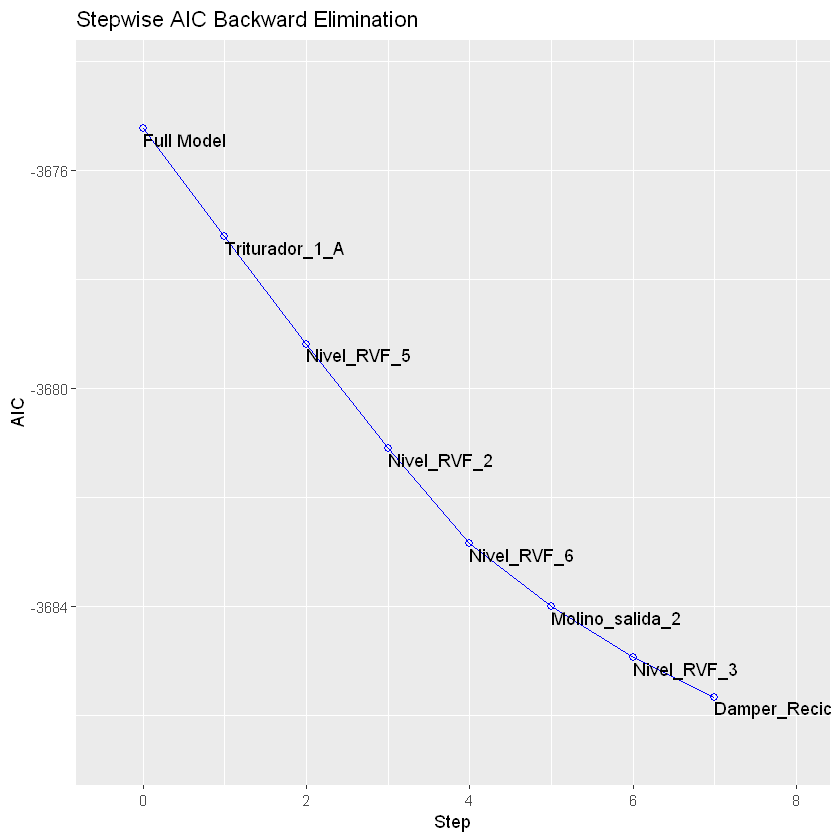

In [104]:
plot(ols_step_backward_aic(LRSABR))

Este grafico confirma las variables seleccionadas en el metodo "Stepwise Regression"

### MLR con datos normalizados con características de operación de secado.

Con base en la experiencía de operación del secador se seleccionan aquellas variables involucradas directamente con el equipo, las cuales son:

- TE
- TS
- Draft
- Motor_Secador
- Damper_Reciclo

In [109]:
# Datos operacionales
LROP <- lm(Humedad ~ TE + TS + Draft + Motor_Secador + Damper_Reciclo, data = train_dataLRN)
ols_regress(LROP)

                        Model Summary                          
--------------------------------------------------------------
R                       0.254       RMSE                0.134 
R-Squared               0.065       Coef. Var          24.239 
Adj. R-Squared          0.063       MSE                 0.018 
Pred R-Squared          0.059       MAE                 0.104 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                 
---------------------------------------------------------------------
               Sum of                                                
              Squares          DF    Mean Square      F         Sig. 
---------------------------------------------------------------------
Regression      3.444           5          0.689     38.57    0.0000 
Residual       49.842        2791          0.018     

In [110]:
yLROP_predict <- predict(LROP, XLRN_test, interval="predict", level = 0.95)
yLROP_pr <- yLROP_predict[,1]

In [111]:
#Regresando las predicciones al rango de operación
yLROP_pr <- (yLROP_pr*(max(test_data2LR['Humedad']) - min(test_data2LR['Humedad']))) + min(test_data2LR['Humedad'])
head(yLROP_pr)

1        2        3        4        5        6 
11.03597 10.92099 10.95781 10.87859 11.33826 10.90768

In [112]:
MSE(test_data2LR$Humedad,yLROP_pr)

[1] 2.866713

In [114]:
(1 - MAPE(yLROP_pr, test_data2LR$Humedad))*100

[1] 85.99803